In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
dum_df=pd.get_dummies(df,drop_first=True)
X=dum_df.drop("left",axis=1)
y=dum_df["left"]

In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2019,stratify=y)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)    
X_test = scaler.transform(X_test)

(X_train.shape, y_train.shape)

((10499, 18), (10499,))

In [10]:
y_train = y_train.values
y_test = y_test.values

In [11]:
tf.random.set_seed(2021)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu',input_shape=(X_train.shape[1], )), 
    tf.keras.layers.Dense(4, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [12]:
model.variables

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                190       
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history = model.fit( X_train,y_train,validation_data=(X_test,y_test),verbose=2,epochs=500)

Epoch 1/500
329/329 - 2s - loss: 0.5853 - accuracy: 0.7309 - val_loss: 0.5238 - val_accuracy: 0.7620 - 2s/epoch - 5ms/step
Epoch 2/500
329/329 - 1s - loss: 0.5051 - accuracy: 0.7619 - val_loss: 0.4772 - val_accuracy: 0.7620 - 696ms/epoch - 2ms/step
Epoch 3/500
329/329 - 1s - loss: 0.4658 - accuracy: 0.7621 - val_loss: 0.4423 - val_accuracy: 0.7616 - 872ms/epoch - 3ms/step
Epoch 4/500
329/329 - 1s - loss: 0.4354 - accuracy: 0.7855 - val_loss: 0.4083 - val_accuracy: 0.8022 - 684ms/epoch - 2ms/step
Epoch 5/500
329/329 - 1s - loss: 0.4065 - accuracy: 0.8109 - val_loss: 0.3815 - val_accuracy: 0.8242 - 817ms/epoch - 2ms/step
Epoch 6/500
329/329 - 1s - loss: 0.3771 - accuracy: 0.8150 - val_loss: 0.3465 - val_accuracy: 0.8313 - 853ms/epoch - 3ms/step
Epoch 7/500
329/329 - 1s - loss: 0.3363 - accuracy: 0.8417 - val_loss: 0.3064 - val_accuracy: 0.8642 - 717ms/epoch - 2ms/step
Epoch 8/500
329/329 - 1s - loss: 0.3029 - accuracy: 0.8623 - val_loss: 0.2789 - val_accuracy: 0.8807 - 801ms/epoch - 2ms/

In [14]:
model.get_weights()

[array([[-1.1770186e+00, -5.8499675e-02,  2.0841477e+00, -2.9993770e-01,
         -8.4431286e+00,  3.4965760e-01,  1.2262714e+00,  1.5006961e+00,
         -8.6554438e-01, -8.3010978e-01],
        [ 1.2279027e+00,  1.1757423e+00, -1.9623388e-01, -9.7905803e-01,
          5.8899239e-02,  1.3627054e-01, -3.0561218e-01, -6.5089512e-01,
         -3.5352376e-01,  1.1831478e+00],
        [ 2.3045079e-01,  5.2696472e-01,  5.5384833e-01, -5.2391148e-01,
          6.5187812e-01, -8.6779423e-02, -5.9149778e-03,  1.1663619e+00,
          6.1237067e-01,  1.0208623e+00],
        [ 9.6146822e-01,  5.2115160e-01, -4.7646910e-01,  1.7374675e-01,
         -9.9787507e-03, -4.9188130e-02, -5.7605809e-01, -6.9656767e-02,
         -1.0609028e+00,  2.2698011e+00],
        [ 6.9104439e-01,  1.4334902e-01, -2.9972455e-01,  3.5251483e-01,
         -7.8052557e-01, -3.5237958e+00, -2.3307843e+00, -3.8390062e+00,
          3.4112976e+00,  5.0538164e-01],
        [-3.2832259e-01, -4.8607364e-01,  6.7768323e-01,  3.

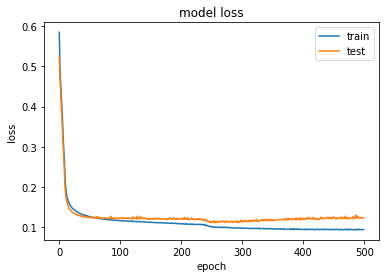

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [23]:
from sklearn.metrics import log_loss
y_pred_prob = model.predict(X_test)
log_loss(y_true=y_test,y_pred=y_pred_prob)



0.12465214080396173

In [24]:
from sklearn.metrics import accuracy_score
predict_probs= model.predict(X_test)
predict_probs[:5]

predict_classes = np.where(predict_probs>=0.5,1,0)
predict_classes[:5]

acc = accuracy_score(y_test,predict_classes)
print(f"Accuracy: {acc}")


Accuracy: 0.9653333333333334


In [25]:
tf.random.set_seed(2021)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu',input_shape=(X_train.shape[1], )), 
    tf.keras.layers.Dense(4, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=2, mode='auto',
        restore_best_weights=True)
history2 = model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=500)


Epoch 1/500
329/329 - 1s - loss: 0.5853 - accuracy: 0.7309 - val_loss: 0.5238 - val_accuracy: 0.7620 - 1s/epoch - 4ms/step
Epoch 2/500
329/329 - 1s - loss: 0.5051 - accuracy: 0.7619 - val_loss: 0.4772 - val_accuracy: 0.7620 - 652ms/epoch - 2ms/step
Epoch 3/500
329/329 - 1s - loss: 0.4658 - accuracy: 0.7621 - val_loss: 0.4423 - val_accuracy: 0.7616 - 637ms/epoch - 2ms/step
Epoch 4/500
329/329 - 1s - loss: 0.4354 - accuracy: 0.7855 - val_loss: 0.4083 - val_accuracy: 0.8022 - 802ms/epoch - 2ms/step
Epoch 5/500
329/329 - 1s - loss: 0.4065 - accuracy: 0.8109 - val_loss: 0.3815 - val_accuracy: 0.8242 - 636ms/epoch - 2ms/step
Epoch 6/500
329/329 - 1s - loss: 0.3771 - accuracy: 0.8150 - val_loss: 0.3465 - val_accuracy: 0.8313 - 608ms/epoch - 2ms/step
Epoch 7/500
329/329 - 1s - loss: 0.3363 - accuracy: 0.8417 - val_loss: 0.3064 - val_accuracy: 0.8642 - 629ms/epoch - 2ms/step
Epoch 8/500
329/329 - 1s - loss: 0.3029 - accuracy: 0.8623 - val_loss: 0.2789 - val_accuracy: 0.8807 - 654ms/epoch - 2ms/

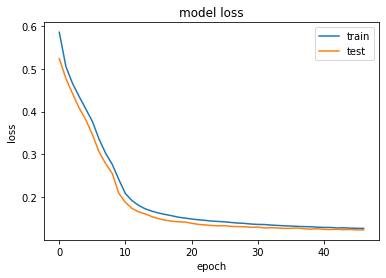

In [26]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [27]:

from sklearn.metrics import log_loss
y_pred_prob = model.predict(X_test)
log_loss(y_true=y_test,y_pred=y_pred_prob)


0.12465214080396173

In [28]:
predict_probs= model.predict(X_test)
predict_probs[:5]

predict_classes = np.where(predict_probs>=0.5,1,0)
predict_classes[:5]


array([[1],
       [0],
       [0],
       [0],
       [1]])

In [29]:

acc = accuracy_score(y_test,predict_classes)
print(f"Accuracy: {acc}")

Accuracy: 0.9653333333333334
